In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
#Discrete Fourier Transform
import numpy as np
import matplotlib.pyplot as plt

#Discrete Fourier Coefficients
def DFT_coeffs(func,l,a,b):    #Make a separate function using def and input into this code along with the 
                               #specified interval [a,b]
    n=(2*l-1)
    ak_coeff = []
    bk_coeff = []
    
    #Constructing the equidistant data (xi,yi) by rescaling the interval [a,b] if
    #it is not [0,2pi]
    xi = (np.pi * np.arange(0,n+1))/l
    ti = (((b-a)*xi)/(2*np.pi))+a
    yi = func(ti)
    
    #Defining cosine and sine functions
    def a1(k):
        co = np.cos(k*xi)
        return (1/l)*(yi*co)
    def b1(k):
        si = np.sin(k*xi)
        return (1/l)*(yi*si)
    
    #Summing the vector components to get the Fourier coefficients and
    #adding them to their respective list
    for k0 in range(0,l+1):
        ak_coeff.append(np.sum(a1(k0)))
    for k1 in range(1,l):
        bk_coeff.append(np.sum(b1(k1)))
    return np.array(ak_coeff),np.array(bk_coeff) #Outputs are the Fourier coefficients 

#Discrete Fourier Transform
def DFT(func,l,a,b):
    def intpoly(x):
        ak,bk = DFT_coeffs(func,l,a,b)
        yy = 0.5*(ak[0] + ak[l]*np.cos(l*x))
        for k in range(1,l):
            yy = yy + ((ak[k]*np.cos((k)*x)) + (bk[k-1]*np.sin((k)*x)))
        return yy
    return intpoly #The output is the actual interpolated polynomial function thus you are able
                   #to use the output as a function for graphing and/or getting specific values


# Examples of DFT Application

$1.$ Let's test the DFT code for the piecewise function $f(x) = \begin{cases}
x, & 0\leq x \leq \pi \\
2\pi - x, & \pi <x \leq 2\pi
\end{cases}$ on the interval $[0,2\pi]$.

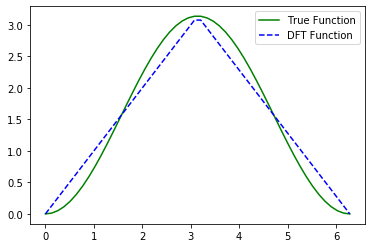

In [17]:

def h(x):
    conds = [(0<=x) & (x<=np.pi),(np.pi<x) & (x<=2*np.pi)]
    funcs = [lambda x: x, lambda x: (2*np.pi)-x]
    return np.piecewise(x,conds,funcs)

t0 = np.linspace(0,(2*np.pi))

v = DFT(h,2,0,2*np.pi)

plt.plot(t0,v(t0),'g',label='True Function')
plt.plot(t0,h(t0),'b--',label='DFT Function')
plt.legend()
plt.show()


$2.$ Let's test the DFT code for the function $f(t)=(t(t+1)(t-2))^{2} - (e^{-t} \sin(t+1)\sin(t-2))^{2}$ on the interval $[0,2\pi]$.

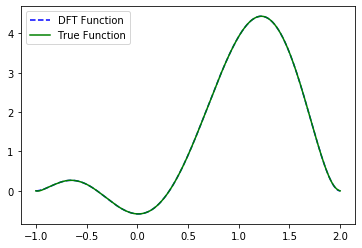

In [19]:

def o(t):
    return ((t*(t+1)*(t-2))**2)-((np.exp(-t)*np.sin(t+1)*np.sin(t-2))**2)

t0 = np.linspace(0,(2*np.pi),1000)
t1 = np.linspace(-1,2,1000)

w = DFT(o,16,-1,2)

plt.plot(t1,o(t1),'b--',label='DFT Function')
plt.plot(t1,w(t0),'g',label='True Function')
plt.legend()
plt.show()
